**Crop Yield Prediction**

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [241]:
df = pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")

In [242]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [243]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [244]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [245]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)


In [246]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [248]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [249]:
df.duplicated().sum()

2310

In [250]:
df.drop_duplicates(inplace=True)

In [251]:
df.duplicated().sum()

0

In [252]:
df.shape

(25932, 7)

In [253]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [254]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                   Year  hg/ha_yield  \
Year                           1.000000     0.091327   
hg/ha_yield                    0.091327     1.000000   
average_rain_fall_mm_per_year -0.006423    -0.004067   
pesticides_tonnes              0.135127     0.065523   
avg_temp                       0.013701    -0.110400   

                               average_rain_fall_mm_per_year  \
Year                                               -0.006423   
hg/ha_yield                                        -0.004067   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.161483   
avg_temp                                            0.333694   

                               pesticides_tonnes  avg_temp  
Year                                    0.135127  0.013701  
hg/ha_yield                             0.065523 -0.110400  
average_rain_fall_mm_per_year           0.161483  0.333694  
pesticides_tonnes                 

**
Data Visualization**

In [255]:
len(df['Area'].unique())

101

In [256]:
len(df['Item'].unique())

10

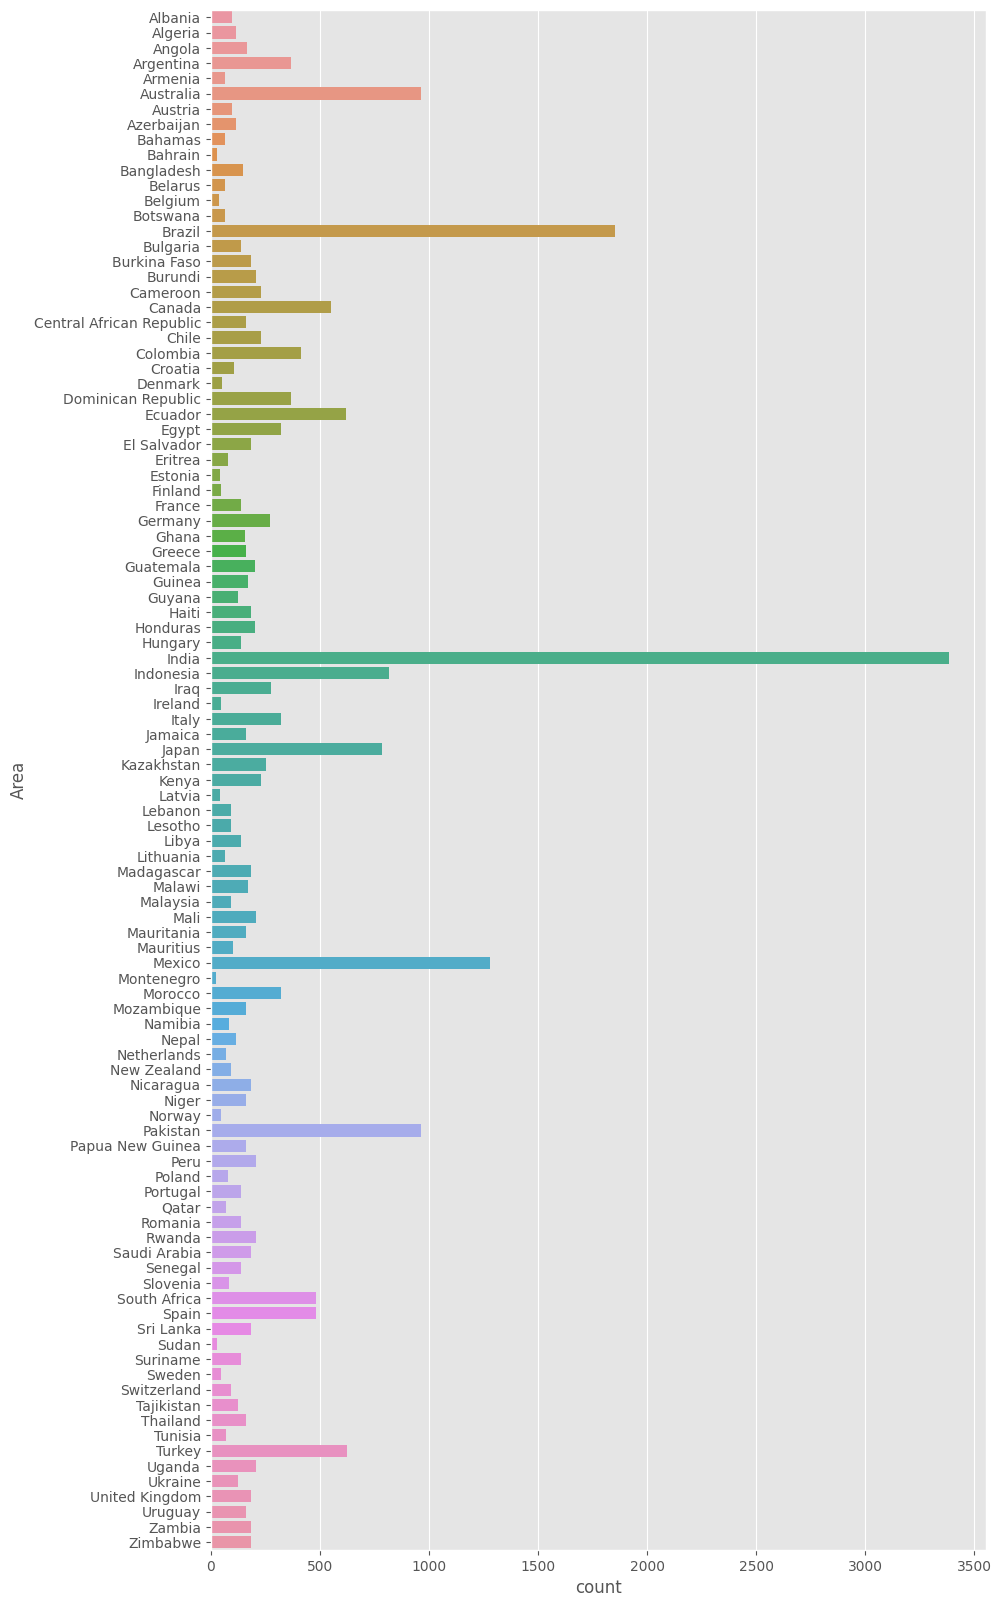

In [257]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['Area'])
plt.show()

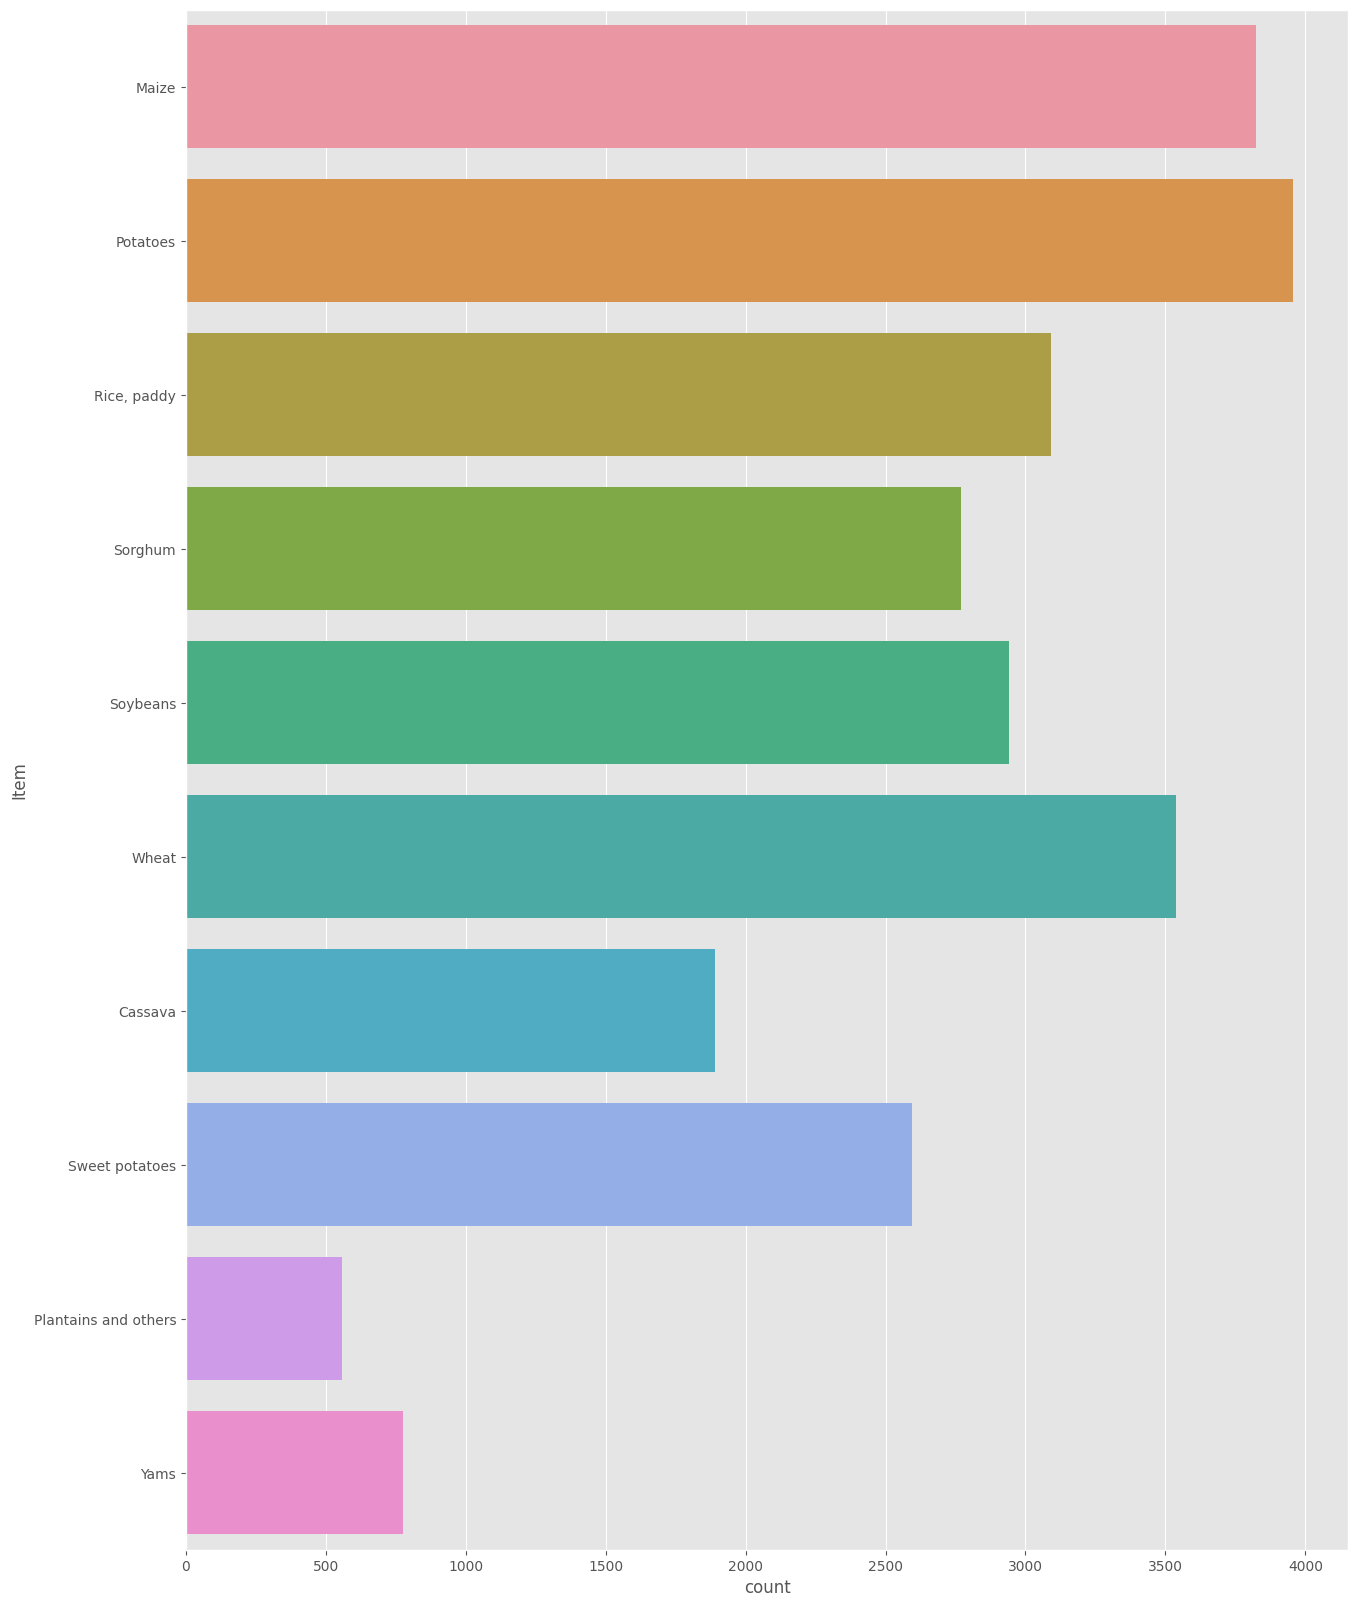

In [258]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

In [259]:
(df['Area'].value_counts() < 400).sum()

88

In [260]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [261]:
df['hg/ha_yield'].sum()

1996196943

In [262]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

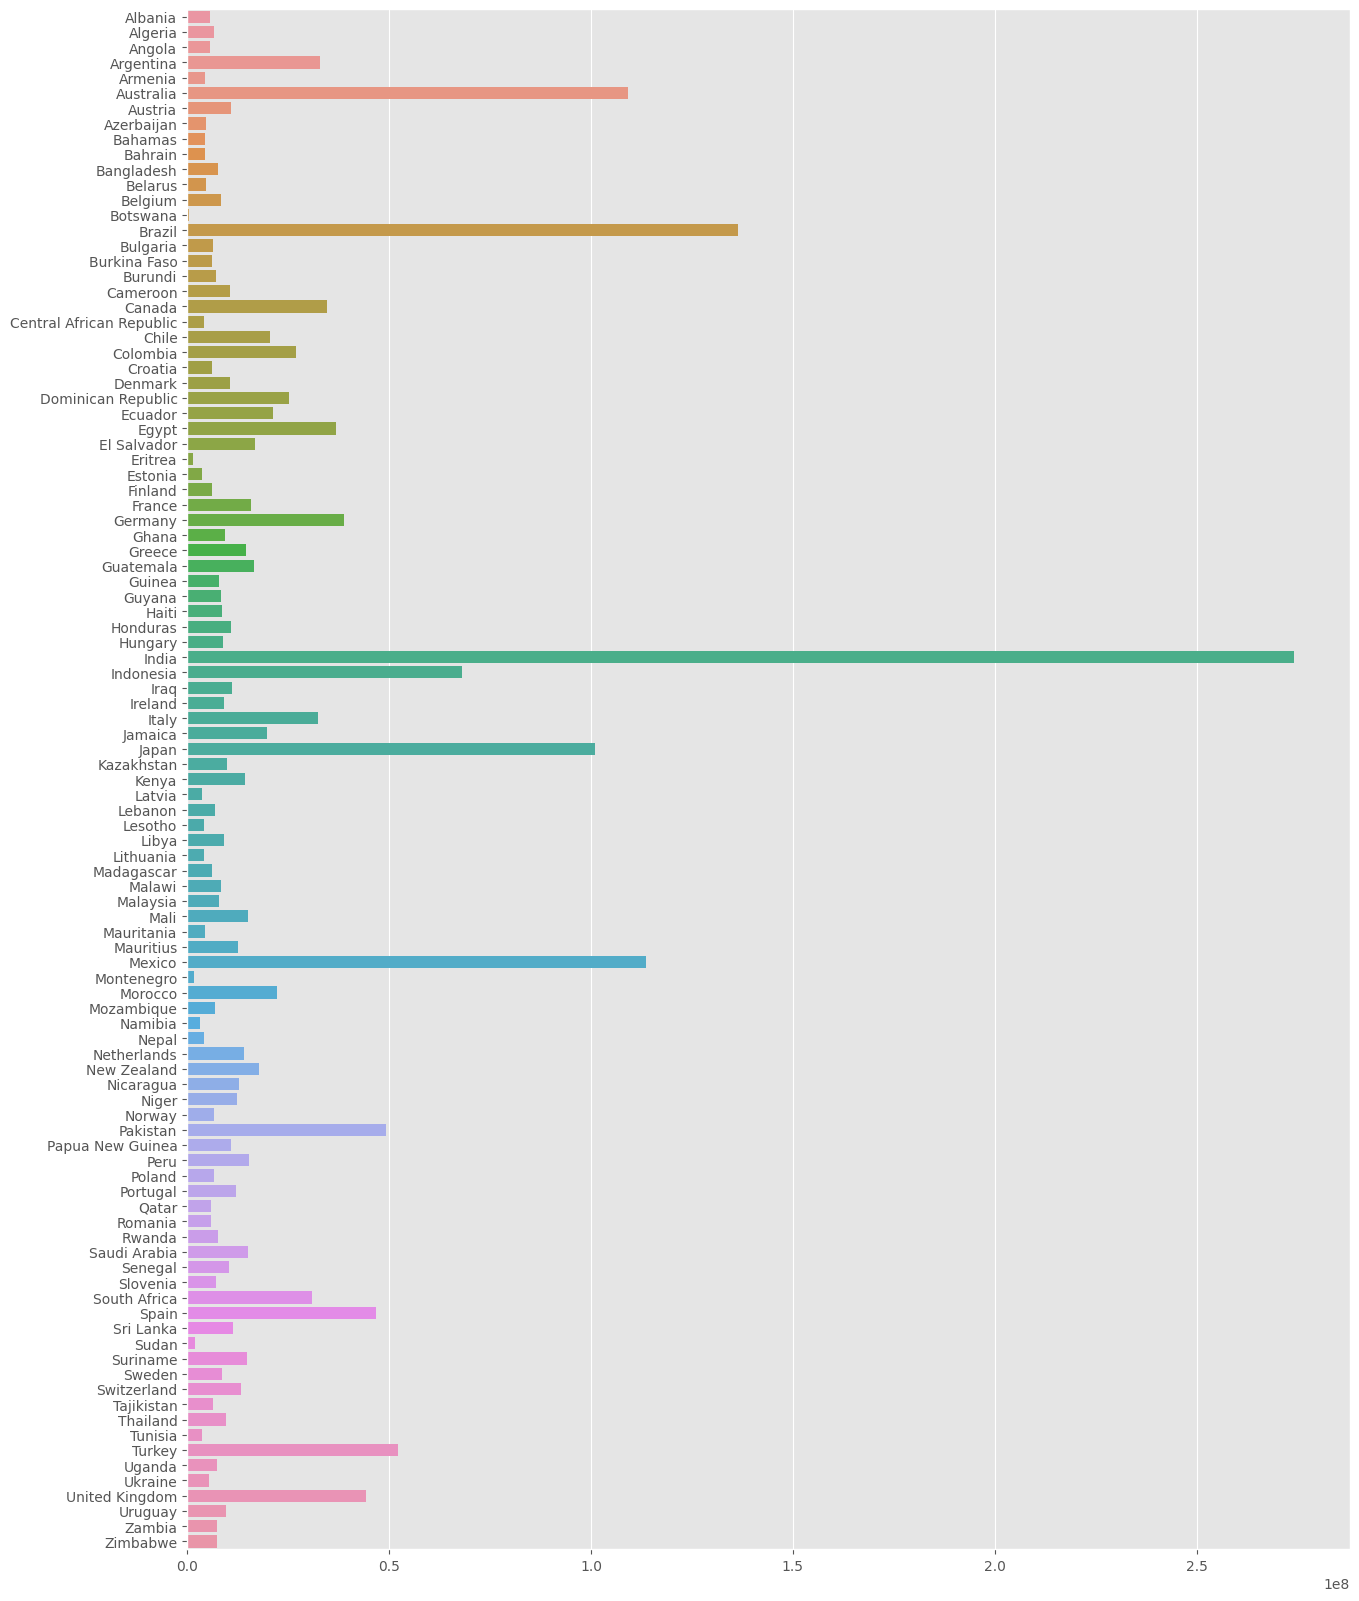

In [263]:
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [264]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

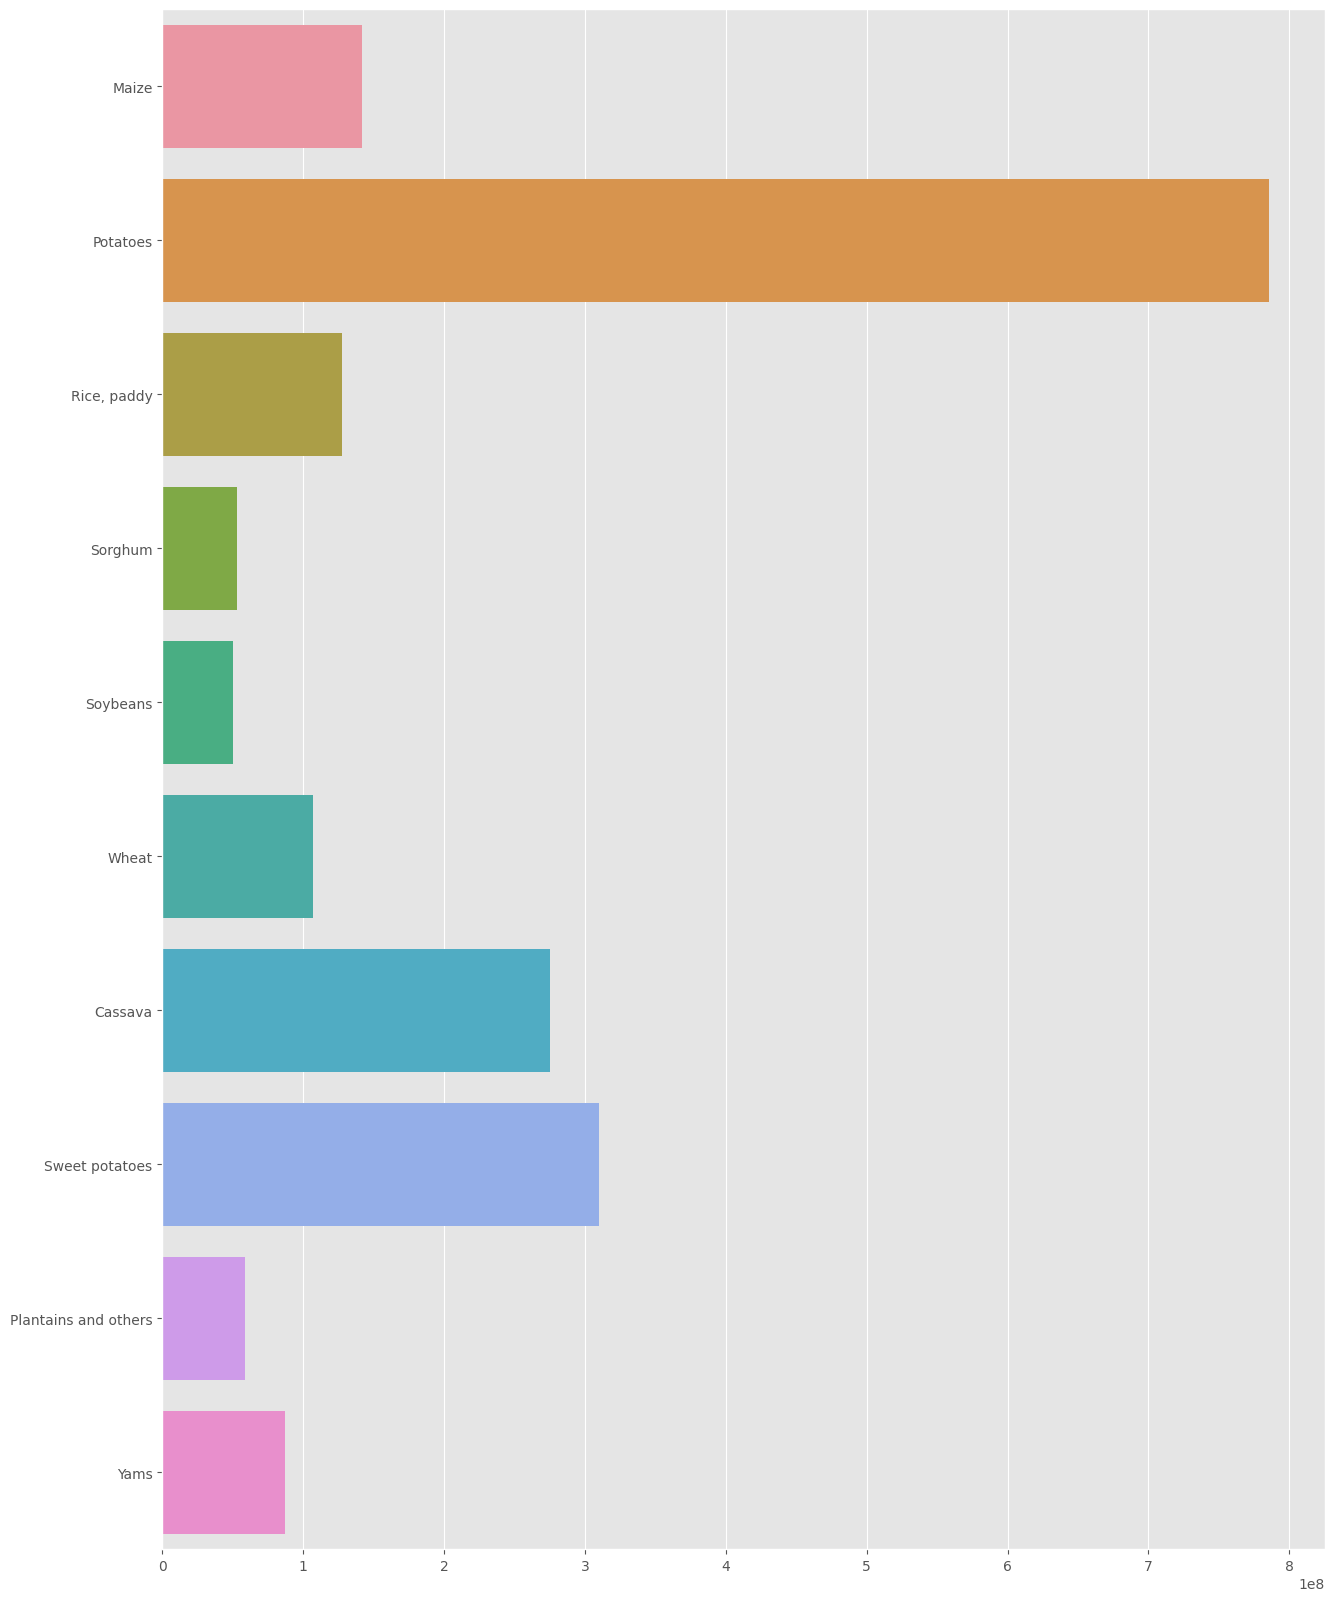

In [265]:
plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [266]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [267]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [268]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [269]:
df = df[col]

In [270]:
df = df[col]

In [271]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [272]:
X.shape

(25932, 6)

In [273]:
y.shape

(25932,)

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [275]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [276]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy  = preprocessor.fit_transform(X_test)

In [ ]:
preprocessor.get_feature_names_out(col[:-1])

In [279]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Fit each model and print the evaluation metrics
for name, model in models.items():
    try:
        model.fit(X_train_dummy, y_train)
        y_pred = model.predict(X_test_dummy)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name}: MAE = {mae:.3f}, R² = {r2:.3f}")
    except Exception as e:
        print(f"{name} model failed due to {str(e)}")


Linear Regression: MAE = 29897.277, R² = 0.747


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE = 29883.831, R² = 0.747
Decision Tree: MAE = 5563.138, R² = 0.969
KNN: MAE = 4679.875, R² = 0.985


In [280]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 15011., 34879., 79048.])

In [281]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [282]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [285]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocessor.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [287]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [289]:
result

36613.0

In [ ]:
item = input("Enter Item (Crop): ")
area = input("Enter Area: ")
year = int(input("Enter Year: "))
avg_rainfall = float(input("Enter average rainfall (mm/year): "))
pesticides = float(input("Enter pesticides used (tonnes): "))
avg_temp = float(input("Enter average temperature (Celsius): "))

features = np.array([[year,avg_rainfall,pesticides,avg_temp,area,item]],dtype=object)
transformed_features = preprocessor.transform(features)
prediction = dtr.predict(transformed_features).reshape(1,-1)
print()
print(f"in {area} year {year} {item} Yield is :{prediction}")